In [1]:
import matplotlib
matplotlib.use('Agg')
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from matplotlib import rcParams
import matplotlib.colors as colors
import os
import glob
from scipy import io
from ace_parse import *

# Plotting preferences
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 14}) 
rcParams['axes.titlepad'] = 14 
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
myFmt = md.DateFormatter('%H')
rule = md.HourLocator(interval=1)

d_loc='/Users/heather/ICECAPS-ACE/'
d1=dt.datetime(2019,9,11,0,0)
d2=dt.datetime(2019,9,12,0,0)
#d_loc = '/home/fluxtower/'
#calfile = '/home/fluxtower/CLASP-ICECAP-ACE/CLASP-cal-Feb2019/calibration-unit-F-Feb2019.mat' 
calfile = '/Users/heather/Desktop/Summit_May_2019/Instruments/CLASP/CLASP-cal-Feb2019/calibration-unit-F-Feb2019.mat' # Calibration .mat file

In [2]:
# For each dataset, get array of counts/cm3. And a seperate array of params.
cpc_counts = get_cpc(d_loc,d1,d2)
skyopc_counts,skyopc_params = get_skyopc(d_loc,d1,d2)
MSF_counts,MSF_params = get_opc('MSF',d_loc,d1,d2)
clasp_counts,clasp_params = get_clasp(d_loc,d1,d2,'CLASP_F',16,calfile,1)

In [3]:
# Calculate total c/cm3 for each dataset - just the sum of c/cm3 in individual bins
MSF_total = MSF_counts.sum(axis=1)
clasp_total = clasp_counts.sum(axis=1)
skyopc_total = skyopc_counts.sum(axis=1)

In [4]:
# For plots, resample everything to 10s by median?.

MSF_total_10 = MSF_total.resample('10s').median()
MSF_counts_10 = MSF_counts.resample('10s').median()
clasp_total_10 = clasp_total.resample('10s').median()
clasp_counts_10 = clasp_counts.resample('10s').median()
skyopc_total_10 = skyopc_total.resample('10s').median()
skyopc_counts_10 = skyopc_counts.resample('10s').median()
cpc_total_10 = cpc_counts.resample('10s').median()


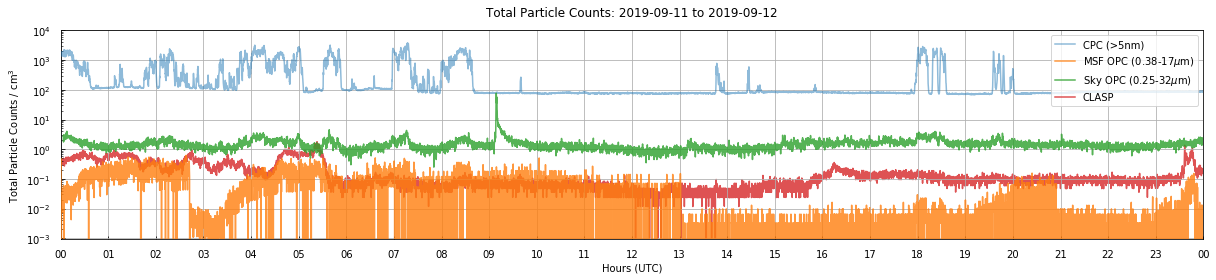

In [36]:
# Plot totals
fig = plt.figure(figsize=(17,4))
ax = fig.add_subplot(111)
ax.grid(True)

ax.semilogy(cpc_total_10.index,cpc_total_10, label='CPC (>5nm)',zorder=3,alpha=0.5)
ax.semilogy(MSF_total_10.index,MSF_total_10,label = 'MSF OPC (0.38-17$\mu$m)',zorder=4,alpha=0.8)  
#ax.semilogy(TAWO_OPC_1min.index,TAWO_OPC_1min,label = 'TAWO OPC (0.38-17$\mu$m)',zorder=2,alpha=0.8)
ax.semilogy(skyopc_total_10.index,skyopc_total_10,label = 'Sky OPC (0.25-32$\mu$m)',zorder=3,alpha=0.8)
ax.semilogy(clasp_total_10.index,clasp_total_10,label = 'CLASP',zorder=1,alpha=0.8)
    
ax.set_ylim(0,10000)
ax.set_ylabel('Total Particle Counts / cm$^3$')
ax.set_title('Total Particle Counts: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))
ax.set_xlabel('Hours (UTC)')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(rule)
ax.set_xlim(d1,d2)
ax.legend(loc='best',fontsize=10)
fig.tight_layout()

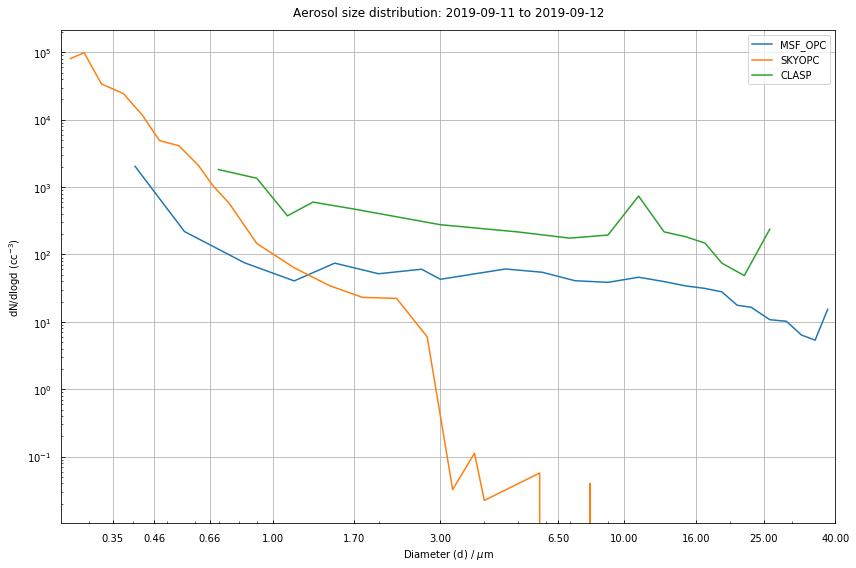

In [7]:
# Plot distribution

# Plot distribution function:
def plot_dist(dists,labels,xlims):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.grid(True)
    for i in range(0,len(dists)):
        if not dists[i]:
            continue
        else:
            ax.loglog(dists[i][0],dists[i][1],label=labels[i])

    ax.set_xlim(xlims[0],xlims[1])
    ax.set_xticks([0.35, 0.46, 0.66, 1, 1.7, 3,6.5,10, 16, 25, 40])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xlabel('Diameter (d) / $\mu$m')
    ax.set_ylabel('dN/dlogd (cc$^{-3}$)')
    ax.legend(loc='best',fontsize=10)
    ax.set_title('Aerosol size distribution: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))
    fig.tight_layout()
    #fig.savefig(d_loc + 'Spectra_current.png')
    #fig.clf()
    # return fig or save fig.

OPC_bins = 24
OPC_bounds = [0.35, 0.46, 0.66, 1, 1.3, 1.7, 2.3, 3, 4, 5.2, 6.5, 8, 10, 12, 14, 16, 18, 20, 22, 25, 28, 31, 34, 37, 40]
SKYOPC_bins = 31
SKYOPC_bounds = [0.25,0.28,0.3,0.35,0.4,0.45,0.5,0.58,0.65,0.7,0.8,1.0,1.3,1.6,2,2.5,3,3.5,4,5,6.5,7.5,8.5,10,12.5,15,17.5,20,25,30,32,40]
CLASP_bins=16
CLASP_bounds=[0.6,0.8,1,1.2,1.4,2,4,6,8,10,12,14,16,18,20,24,28]

MSF_dist = get_dist(MSF_counts_10,OPC_bins,OPC_bounds)
SKYOPC_dist= get_dist(skyopc_counts_10,SKYOPC_bins,SKYOPC_bounds)
CLASP_dist= get_dist(clasp_counts_10,CLASP_bins,CLASP_bounds)

plot_dist([MSF_dist,SKYOPC_dist,CLASP_dist],['MSF_OPC','SKYOPC','CLASP'],[SKYOPC_bounds[0],SKYOPC_bounds[-1]])


/Users/heather/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


/Users/heather/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


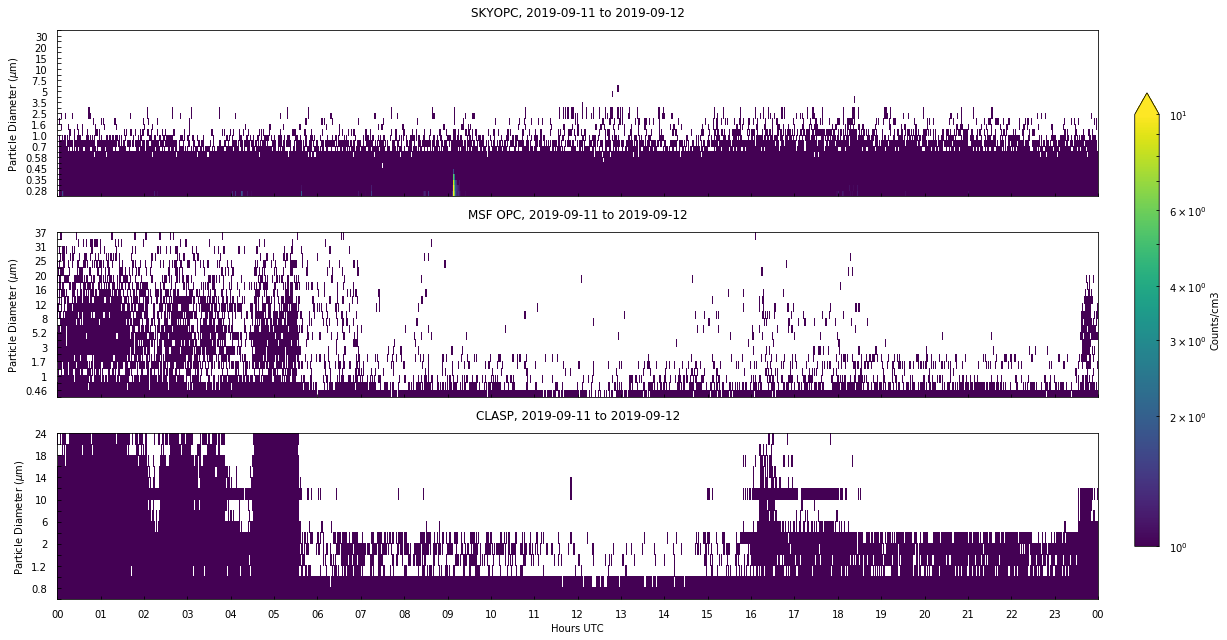

In [8]:
# Plot time series spectra
skyopc_counts_np = skyopc_counts_10.to_numpy()
skyopc_dates = np.array(skyopc_counts_10.index.to_pydatetime())

msf_counts_np = MSF_counts_10.to_numpy()
msf_dates = np.array(MSF_counts_10.index.to_pydatetime())

clasp_counts_np = clasp_counts_10.to_numpy()
clasp_dates = np.array(clasp_counts_10.index.to_pydatetime())
 
in_x = [skyopc_dates,msf_dates,clasp_dates]
in_y = [skyopc_counts_np,msf_counts_np,clasp_counts_np]
in_bounds = [SKYOPC_bounds,OPC_bounds,CLASP_bounds]
in_names = ['SKYOPC','MSF OPC','CLASP']

#if len(in_list[0])!=len(in_list[1]):
#    print('Input lists are not the same length')

nrow = len(in_x)
fig, axs = plt.subplots(nrows=nrow, ncols=1,squeeze=0,sharex=True,figsize=(17,3*nrow))
for i in range(0,nrow):
    x = in_x[i]
    y = in_y[i]
    bins=in_bounds[i]
    name = in_names[i]
    cs = axs[i][0].pcolormesh(x,np.arange(0,len(bins)-1,1),np.transpose(y),norm=colors.LogNorm(vmin=1, vmax=10),cmap='viridis')

    #else:
    #    cb = plt.colorbar(cs,extend='max',label='Counts')
    #    cb.remove()
    
    axs[i][0].xaxis_date()
    axs[i][0].set_title('%s, %s to %s'%(name,dt.datetime.strftime(d1,'%Y-%m-%d'),dt.datetime.strftime(d2,'%Y-%m-%d')))
    axs[i][0].set_yticks(np.arange(0,len(bins)-1,1))
    axs[i][0].tick_params(axis='y', which='major', labelsize=10) 
    for label in axs[i][0].yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    axs[i][0].set_yticklabels(bins)
    axs[i][0].set_ylabel('Particle Diameter ($\mu$m)')
    if i==nrow-1:
        axs[i][0].set_xlabel('Hours UTC')
    axs[i][0].set_xlim(d1,d2)
    axs[i][0].xaxis.set_major_formatter(myFmt)
    axs[i][0].xaxis.set_major_locator(rule)   

fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(cs,cax=cbar_ax,extend='max',label='Counts/cm3')



#fig.savefig(d_loc + '%s_timeseries_current.png'%name)
#fig.clf()


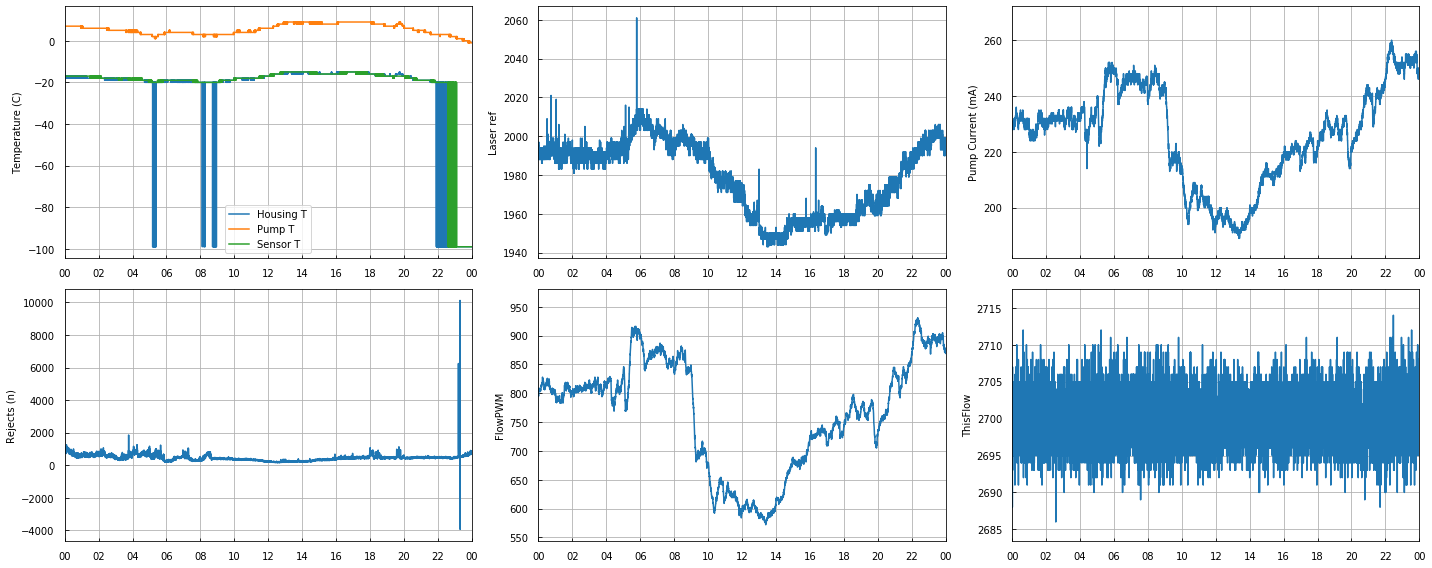

In [21]:
# Plot CLASP params
# FlowPWM, temperatures, LaserR, PumpCurrent, Rejects, This Flow
clasp_params = clasp_params.dropna()
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(231)
ax1.grid(True)
ax1.plot(clasp_params.index,clasp_params['HousingT (C)'],label='Housing T')
ax1.plot(clasp_params.index,clasp_params['PumpT (C)'],label='Pump T')
ax1.plot(clasp_params.index,clasp_params['SensorT (C)'],label='Sensor T')
ax1.set_xlim(d1,d2)
ax1.set_ylabel('Temperature (C)')
ax1.legend(loc='best',fontsize=10)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_major_locator(md.HourLocator(interval=2))  

ax2 = fig.add_subplot(232)
ax2.grid(True)
ax2.plot(clasp_params.index,clasp_params['LaserR'])
ax2.set_xlim(d1,d2)
ax2.set_ylabel('Laser ref')
ax2.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_locator(md.HourLocator(interval=2))

ax3 = fig.add_subplot(233)
ax3.grid(True)
ax3.plot(clasp_params.index,clasp_params['PumpCurrent (mA)'])
ax3.set_xlim(d1,d2)
ax3.set_ylabel('Pump Current (mA)')
ax3.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_locator(md.HourLocator(interval=2))

ax4 = fig.add_subplot(234)
ax4.grid(True)
ax4.plot(clasp_params.index,clasp_params['Rejects (n)'])
ax4.set_xlim(d1,d2)
ax4.set_ylabel('Rejects (n)')
ax4.xaxis.set_major_formatter(myFmt)
ax4.xaxis.set_major_locator(md.HourLocator(interval=2))

ax5 = fig.add_subplot(235)
ax5.grid(True)
ax5.plot(clasp_params.index,clasp_params['FlowPWM'])
ax5.set_xlim(d1,d2)
ax5.set_ylabel('FlowPWM')
ax5.xaxis.set_major_formatter(myFmt)
ax5.xaxis.set_major_locator(md.HourLocator(interval=2))

ax6 = fig.add_subplot(236)
ax6.grid(True)
ax6.plot(clasp_params.index,clasp_params['ThisFlow'])
ax6.set_xlim(d1,d2)
ax6.set_ylabel('ThisFlow')
ax6.xaxis.set_major_formatter(myFmt)
ax6.xaxis.set_major_locator(md.HourLocator(interval=2))

fig.tight_layout()
    #fig.savefig(d_loc + 'Spectra_current.png')
    #fig.clf()